In [2]:
import time, datetime
import numpy as np
from numpy import zeros, sqrt, pi, vectorize
from numpy.linalg import pinv, inv
from multiprocessing import Process, Queue
#import matplotlib
#matplotlib.use('Qt4Agg')
import matplotlib.pyplot as plt
from error_analysis_class import *
from noshellavg import *
from matplotlib.backends.backend_pdf import PdfPages


import sys
import argparse
import yaml

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from run_error_analysis import *

In [292]:
param_file = 'yaml/ellipse_test2.yaml'
params = yaml.load(open(param_file))

kmin, kmax, kN = params['k']
rmin, rmax, rN = params['r']
logscale = params['logscale']
KMIN, KMAX = 1e-10, 2.0

SNR = params['SNR']
Reid = params['Reid']   
lmax = params['lmax']

parameter_ind = [0,1,2] #params['parameter_ind']
RSDPower = NoShell_covariance(KMIN, KMAX, rmin, rmax, 2**10 + 1, rN, 1, kN, logscale = logscale)

-------------------------------------------------------------------        
class error_analysis, no RSD         
z = 0.0, kN =1025, N_y = 1000, rN = 141
dr = 1.0, dk=0.0019531249999, dk_y=0.0020020020019


In [364]:
#Covariance_matrix(params, RSDPower)
#P_multipole(params, RSDPower)
#derivative_P_datavector(params, RSDPower)
#derivative_Xi_datavector(params, RSDPower)
#params_datavector(params, RSDPower)
BandpowerFisher(params, RSDPower, kmin = kmin, kmax = kmax, lmax = lmax) 
Fisher_params(params, RSDPower, parameter = parameter_ind, kmin=kmin, kmax=kmax, lmax=lmax)
#CumulativeSNR(params, RSDPower, kmin=0, kmax=2, lmax=lmax)

(2997, 300) (2997, 420)

Use Precalculated FisherP  data_txt/cov/ellipse_test2_bandpower_PP.fisher
Use Precalculated FisherXi  data_txt/cov/ellipse_test2_bandpower_Xi.fisher
calculating Fisher tot
1.07063508034
0
Fishertot saved  data_txt/cov/ellipse_test2_bandpower_tot.fisher
(900,) 300 3
(8991,) 2997 3
file save to  data_txt/ellipse_test2_fisher_params.txt


In [361]:
delete_key(params,'fisher_bandpower_tot_filename')

In [354]:
data_P = np.genfromtxt(params['derivative_P_filename'])

In [357]:
test_vector = np.zeros((data_P.shape))
np.fill_diagonal(test_vector, 1)
test_vector_masked = masking_datav(RSDPower, test_vector, kmin = 0, kmax = 0.2, lmax=lmax)

In [313]:
datav_P = masking_datav(RSDPower, np.genfromtxt(params['derivative_P_filename']), kmin = kmin, kmax = kmax, lmax=0)
datav_Xi = masking_datav(RSDPower, np.genfromtxt(params['derivative_Xi_filename']), xi=True, lmax=0)

#datav = np.concatenate((datav_P,datav_Xi), axis=1)

In [328]:
datav_P[:,:333]

34.0

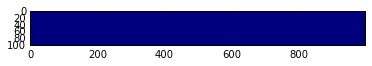

In [332]:
fig, ax = plt.subplots()
ax.imshow(test_vector)

In [278]:
np.where(datav_P == 1)

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
         5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
         6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
         8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10]),
 array([  0, 101, 202, 303, 404, 505, 606, 707, 808, 909,  11, 112, 213,
        314, 415, 516, 617, 718, 819, 920,  22, 123, 224, 325, 426, 527,
        628, 729, 830, 931,  33, 134, 235, 336, 437, 538, 639, 740, 841,
        942,  44, 145, 246, 347, 448, 549, 650, 751, 852, 953,  55, 156,
        257, 358, 459, 560, 661, 762, 863, 964,  66, 167, 268, 369, 470,
        571, 672, 773, 874, 975,  77, 178, 279, 380, 481, 582, 683, 784,
        885, 986,  88, 189, 290, 391, 492, 593, 694, 795, 896, 997,  99,
        200, 301, 402, 503, 604, 705, 8

In [280]:
datav_P[0,101]

1.0

In [242]:
def delete_key(params, key):
    params.pop(key, None)

In [1076]:
ls yaml/reid_bf_kN1000_rN90.yaml

yaml/reid_bf_kN1000_rN90.yaml


In [217]:
param_file_list = [
    #'yaml/sanchez_rN70_kN1000.yaml',
    #'yaml/sanchez_rN70_kN1000_bfsn.yaml',
    #'yaml/sanchez_rN70_kN1000_nodiag_inv.yaml',
    #'yaml/sanchez_rN70_kN1000_nooff.yaml'
    #'yaml/sanchez_rN70_kN1000_pinv_rcond.yaml'
    #'yaml/sanchez_rN70_kN1000_pinv_rcond2.yaml'
    #'yaml/sanchez_rN70_kN1000_pinv_rcond3.yaml'
    #'yaml/satpathy.yaml',
    #'yaml/satpathy_bfsn.yaml',
    #'yaml/ellipse_test.yaml',
    #'yaml/ellipse_test_bfsn.yaml'
    
    #'yaml/reid_bf_kN1000_rN90.yaml',
    #'yaml/reid_bfs_kN1000_rN90.yaml',
    #'yaml/reid_bfsn_kN1000_rN90.yaml'
    'yaml/reid_bf_kN1000_rN180_p0.yaml'
    ]
for param_file in param_file_list : 
    params = yaml.load(open(param_file))
    run_error_analysis(params)

-------------------------------------------------------------------        
class error_analysis, no RSD         
z = 0.0, kN =1025, N_y = 1000, rN = 181
dr = 0.999994444444, dk=0.0019531249999, dk_y=0.0020020020019
Use Precalculated CovPP  data_txt/cov/reid_bf_kN1000_rN180_PP.cov
Use Precalculated CovXi  data_txt/cov/reid_bf_kN1000_rN180_Xi.cov
Use Precalculated CovPXi  data_txt/cov/reid_bf_kN1000_rN180_PXi.cov

Use Precalculated multipole_p  data_txt/datav/reid_bf_kN1000_rN180_multipole_p.datavector
Use Precalculated derivative_P  data_txt/datav/reid_bf_kN1000_rN180_P.datavector
Use Precalculated derivative_Xi  data_txt/datav/reid_bf_kN1000_rN180_Xi.datavector

Use Precalculated params_datavector  data_txt/datav/reid_bf_kN1000_rN180_params.datavector

Use Precalculated FisherP  data_txt/cov/reid_bf_kN1000_rN180_p0_bandpower_PP.fisher
Use Precalculated FisherXi  data_txt/cov/reid_bf_kN1000_rN180_p0_bandpower_Xi.fisher
Use Precalculated Fisher_tot  data_txt/cov/reid_bf_kN1000_rN180_p0_

/n/home00/lee.5922/.local/lib/python2.7/site-packages/scipy/integrate/quadrature.py:392: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  x = x.reshape(tuple(shapex))
/n/home00/lee.5922/.local/lib/python2.7/site-packages/scipy/integrate/quadrature.py:392: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  x = x.reshape(tuple(shapex))
/n/home00/lee.5922/.local/lib/python2.7/site-packages/scipy/integrate/quadrature.py:392: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  x = x.reshape(tuple(shapex))


ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [296]:
#lmax = 0
covP = np.genfromtxt(params['covPP_filename'])
covP_masked = masking(RSDPower, covP, kmin = kmin, kmax = kmax, lmax = lmax)
covPXi = np.genfromtxt(params['covPXi_filename'])
covPXi_masked = masking(RSDPower, covPXi, kmin = kmin, kmax = kmax, lmax = lmax)
covXi = np.genfromtxt(params['covXi_filename'])
covXi_masked = masking(RSDPower, covXi, xi=True, lmax=lmax)
#FisherP = DiagonalBlockwiseInversion3x3(*tuple(covPPlist))

fisher_P = np.genfromtxt(params['fisher_bandpower_P_filename'])
fisher_Xi = np.genfromtxt(params['fisher_bandpower_Xi_filename'])
fisher_tot = np.genfromtxt(params['fisher_bandpower_tot_filename'])

In [311]:
from test_SNR import _reordering, blockwise
Fisher_P_re = _reordering(fisher_P, lmax=lmax)
Fisher_Xi_re = _reordering(fisher_Xi, lmax=lmax)
Fisher_tot_re = _reordering(fisher_tot, lmax=lmax)

In [303]:
params['covPP_filename']

'data_txt/cov/ellipse_test2_PP.cov'

In [305]:
covP.shape, covP_masked.shape

((2997, 2997), (300, 300))

In [298]:
print covP_masked.shape
print covPXi_masked.shape

(300, 300)
(300, 420)


/usr/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log10
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in log10
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in log10
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in log10
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in log10
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in log10


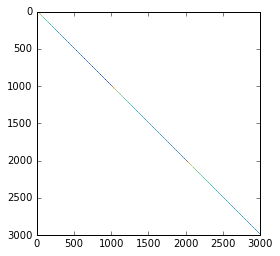

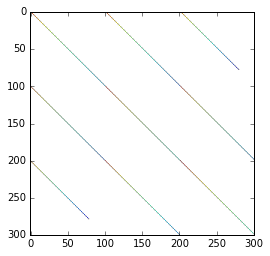

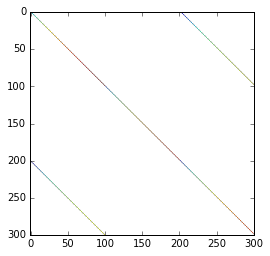

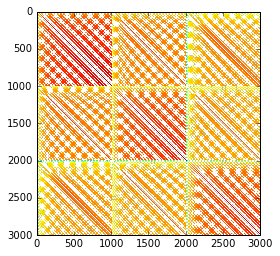

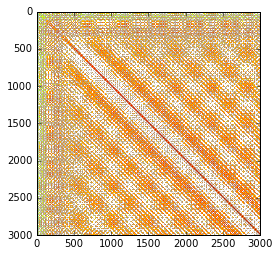

In [312]:
fig, ax = plt.subplots()
ax.imshow(np.log10(covP))

fig, ax = plt.subplots()
ax.imshow(np.log10(covP_masked))

fig, ax = plt.subplots()
ax.imshow(np.log10(fisher_P))

fig, ax = plt.subplots()
ax.imshow(np.log10(fisher_Xi))

fig, ax = plt.subplots()
ax.imshow(np.log10(Fisher_tot_re))


In [168]:
params_datav = np.genfromtxt(params['params_datavector_filename'])
datav_Xi =np.genfromtxt(params['derivative_Xi_filename'])

In [144]:
params_datav.shape

(4, 2997)

In [153]:
from run_error_analysis import masking_paramsdatav

In [172]:
datav_Xi.shape

(2997, 540)

In [177]:
params_datav_masked = masking_paramsdatav(RSDPower, params_datav, kmin=kmin, kmax=kmax, lmax=2)
datav_Xi_masked = masking_datav(RSDPower,datav_Xi, xi=True, lmax=0)

In [178]:
datav_Xi_masked.shape

(999, 180)

In [ ]:
datav

In [150]:
params_datav_masked.shape

(4, 1998)

In [62]:
np.sum(Fisher_Xi_re.diagonal() < 0 )

0

In [17]:
np.sum(Fisher_Xi_re.diagonal() < 0.0 )

0

In [1045]:
cut = RSDPower.kcenter_y.size
covPPlist = [covP[:cut, :cut], covP[:cut, cut:2*cut], covP[:cut, 2*cut:],
            covP[:cut, cut:2*cut].T, covP[cut:2*cut, cut:2*cut], covP[cut:2*cut, 2*cut:], 
            covP[:cut, 2*cut:].T, covP[cut:2*cut, 2*cut:].T, covP[2*cut:, 2*cut:]]
FisherP = DiagonalBlockwiseInversion3x3(*tuple(covPPlist))
FisherP_masked = masking(RSDPower, FisherP, kmin=kmin, kmax=kmax)
#FisherP = np.genfromtxt(params['fisher_bandpower_P_filename'])

In [1046]:
Cov3_tot = np.vstack(( np.hstack(( covP_masked, covPXi_masked )), np.hstack(( covPXi_masked.T, covXi_masked )) ))

In [931]:
F_Cov3_tot = pinv(Cov3_tot)

In [932]:
np.sum(F_Cov3_tot.diagonal() < 0)

293

In [1047]:
ia = masking(RSDPower, FisherP_masked, kmin=kmin, kmax=kmax, lmax = lmax)
b = covPXi_masked
c = covPXi_masked.T 
d = covXi_masked

Cd = d - np.dot( np.dot( c, ia ), b )
Fd = pinv(Cd, rcond=1e-30)
#Fd = inv(Cd)
Fc = - np.dot( np.dot( Fd, c ), ia )
Fb = - np.dot( np.dot( ia, b ), Fd )
Fa = ia + np.dot( np.dot (np.dot( np.dot( ia, b), Fd ), c), ia)

Fisher3_tot = np.vstack(( np.hstack(( Fa, Fb )), np.hstack(( Fc, Fd )) ))

In [998]:
"""

a = masking(RSDPower, covP, kmin=kmin, kmax=kmax)
b = covPXi_masked
c = covPXi_masked.T 
Id = inv(covXi)

Fa = pinv(a - np.dot( np.dot( b, Id ), c ), rcond=1e-30)
Fa = masking(RSDPower, Fa, kmin=kmin, kmax=kmax)
Fb = - np.dot( np.dot( Fa, b ), Id )
Fc = - np.dot( np.dot( Id, c ), Fa )
Fd = Id + np.dot( np.dot (np.dot( np.dot( Id, c), Fa ), b), Id)

Fisher3_tot2 = np.vstack(( np.hstack(( Fa, Fb )), np.hstack(( Fc, Fd )) ))

"""

In [1050]:
datav_P = masking_datav(RSDPower, np.genfromtxt(params['derivative_P_filename']), kmin = kmin, kmax = kmax, lmax=lmax)
datav_Xi = masking_datav(RSDPower, np.genfromtxt(params['derivative_Xi_filename']), xi=True, lmax=lmax)
datav = np.concatenate((datav_P,datav_Xi), axis=1)

In [1051]:
FisherBand_tot = FisherProjection_Fishergiven(datav, Fisher3_tot)

In [1055]:
print np.sum(FisherBand_tot.diagonal() < 0)
#print np.sum(FisherBand_tot2.diagonal() < 0)
#print np.allclose(FisherBand_tot, FisherBand_tot2)

0


In [1056]:
params_datav = np.genfromtxt(params['params_datavector_filename'])
params_datav_mar = np.vstack(([ params_datav[p,:] for p in parameter_ind] ))
params_datav_mar_kcut = masking_datav(RSDPower, params_datav_mar, kmin=kmin, kmax=kmax)

In [1057]:
F_params_tot = np.dot( np.dot( params_datav_mar, FisherBand_tot), params_datav_mar.T)
#F_params_tot2 = np.dot( np.dot( params_datav_mar, FisherBand_tot2), params_datav_mar.T)

In [1054]:
print F_params_tot

[[-110979.75428872  -22552.29528833    4585.94362937]
 [ -22552.29528833    6527.02501122     994.82120915]
 [   4585.94362937     994.82120915    -113.43536398]]


In [1022]:
cat data_txt/sanchez_rN70_kN1000_pinv_rcond_fisher_params.txt

0.000000000000000000e+00 1.949183169199905242e+05 1.438107445506548356e+04 2.048927488932717242e+05
1.000000000000000000e+00 5.658024553415676201e+04 4.878218598447398108e+03 6.296604557824500080e+04
2.000000000000000000e+00 -2.074130955217819064e+03 1.872416552212756713e+01 -2.051791265395451319e+03
3.000000000000000000e+00 5.658024553415679839e+04 4.878218598447419026e+03 6.296604557824494259e+04
4.000000000000000000e+00 3.194054078673470940e+04 9.893335633155007599e+03 3.692916349237818213e+04
5.000000000000000000e+00 -1.210260964462681159e+03 -1.516358270035092914e+02 -1.451247451267487122e+03
6.000000000000000000e+00 -2.074130955217819064e+03 1.872416552212731489e+01 -2.051791265395452228e+03
7.000000000000000000e+00 -1.210260964462682068e+03 -1.516358270035100873e+02 -1.451247451267490305e+03
8.000000000000000000e+00 6.008128318039045723e+01 4.235159216427672568e+00 9.221371964899428519e+01


In [1023]:
cat data_txt/sanchez_rN70_kN1000_pinv_rcond2_fisher_params.txt

0.000000000000000000e+00 1.949183169199905242e+05 1.438107445506548356e+04 2.554790739313504309e+05
1.000000000000000000e+00 5.658024553415676201e+04 4.878218598447398108e+03 8.183594325497488899e+04
2.000000000000000000e+00 -2.074130955217819064e+03 1.872416552212756713e+01 -4.053130493849669165e+03
3.000000000000000000e+00 5.658024553415679839e+04 4.878218598447419026e+03 8.183594325497433601e+04
4.000000000000000000e+00 3.194054078673470940e+04 9.893335633155007599e+03 4.591970318263855006e+04
5.000000000000000000e+00 -1.210260964462681159e+03 -1.516358270035092914e+02 -2.280324449186010952e+03
6.000000000000000000e+00 -2.074130955217819064e+03 1.872416552212731489e+01 -4.053130493849646427e+03
7.000000000000000000e+00 -1.210260964462682068e+03 -1.516358270035100873e+02 -2.280324449185993672e+03
8.000000000000000000e+00 6.008128318039045723e+01 4.235159216427672568e+00 1.589004487427622507e+02


/usr/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in log10


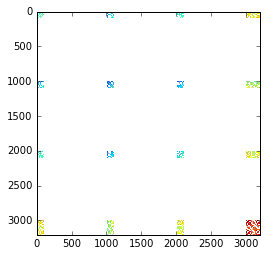

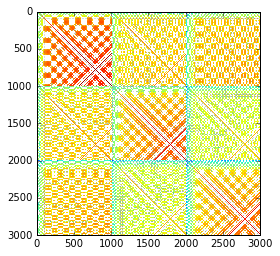

In [1059]:
fig, ax = plt.subplots()
ax.imshow(np.log10(Fisher3_tot))

fig, ax = plt.subplots()
ax.imshow(np.log10(FisherBand_tot))

In [804]:
np.allclose(Fisher3_tot, Fisher3_tot2)

False

In [833]:
import numpy as np

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log10
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log10


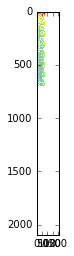

In [848]:
a = masking(RSDPower, covPXi, kmin=kmin, kmax=2, lmax=0)
#print a[:RSDPower.rcenter.size,:RSDPower.rcenter.size]
fig, ax = plt.subplots()
ax.imshow(np.log10(a))

In [610]:
Bandpower_P = np.genfromtxt(params['fisher_bandpower_P_filename'])
Bandpower_Xi = np.genfromtxt(params['fisher_bandpower_Xi_filename'])
Bandpower_tot = np.genfromtxt(params['fisher_bandpower_tot_filename'])

In [752]:
print np.sum(Bandpower_P.diagonal() < 0)
print np.sum(Bandpower_Xi.diagonal() < 0)
print np.sum(Bandpower_tot.diagonal() < 0)

0
0
34


In [771]:
np.argwhere(Bandpower_tot.diagonal() < 0)

array([[  62],
       [  63],
       [  68],
       [  69],
       [  70],
       [  71],
       [  77],
       [  78],
       [  79],
       [  80],
       [ 561],
       [ 562],
       [ 569],
       [ 570],
       [ 571],
       [ 580],
       [1060],
       [1062],
       [1063],
       [1066],
       [1067],
       [1070],
       [1071],
       [1072],
       [1079],
       [1080],
       [1081],
       [1082],
       [1089],
       [1090],
       [1091],
       [1099],
       [1100],
       [1101]])

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in log10
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in log10


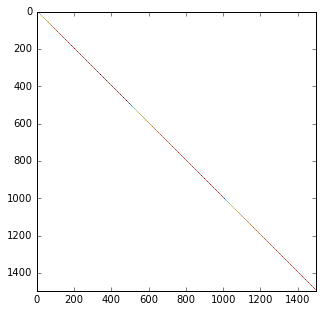

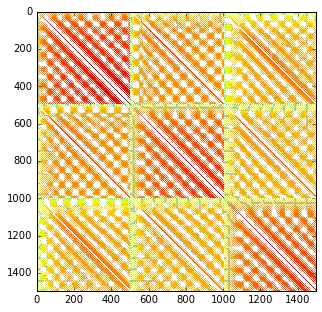

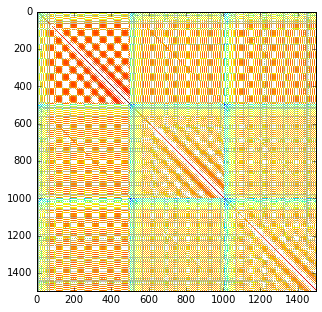

In [755]:
fig, ax = plt.subplots(figsize = (5,5))
ax.imshow(np.log10(Bandpower_P))

fig, ax = plt.subplots(figsize = (5,5))
ax.imshow(np.log10(Bandpower_Xi))

fig, ax = plt.subplots(figsize = (5,5))
ax.imshow(np.log10(Bandpower_tot))

In [115]:
datav_P = masking_datav(RSDPower, np.genfromtxt(params['derivative_P_filename']), kmin = kmin, kmax = kmax)
datav_Xi = np.genfromtxt(params['derivative_Xi_filename'])
datav = np.concatenate((datav_P,datav_Xi), axis=1)

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log10
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in log10
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in log10
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in log10


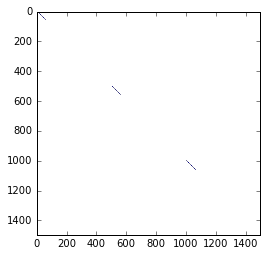

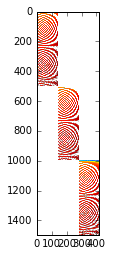

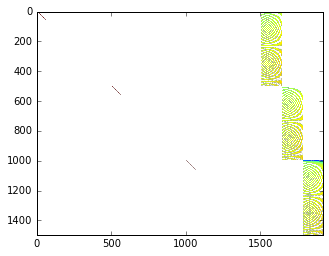

In [117]:
fig, ax = plt.subplots()
ax.imshow(np.log10(datav_P))

fig, ax = plt.subplots()
ax.imshow(np.log10(datav_Xi))

fig, ax = plt.subplots()
ax.imshow(np.log10(datav))

In [89]:
FisherP = np.genfromtxt(params['fisher_bandpower_P_filename'])
covXi = np.genfromtxt(params['covXi_filename'])
b = covPXi
c = covPXi.T #matrix[cutInd+1:, 0:cutInd+1]
d = covXi
ia = masking(RSDPower, FisherP, kmin=kmin, kmax=kmax)

import time
t1 = time.time()
Fd = pinv( d - np.dot( np.dot( c, ia ), b) )

print time.time()-t1

Fc = - np.dot( np.dot( Fd, c), ia)

print time.time()-t1
Fb = - np.dot( np.dot( ia, b ), Fd )

print time.time()-t1
Fa = ia + np.dot( np.dot (np.dot( np.dot( ia, b), Fd ), c), ia)

print time.time()-t1
Fisher3_tot = np.vstack(( np.hstack(( Fa, Fb )), np.hstack(( Fc, Fd )) ))

8.39162611961
13.4590601921
17.0062441826
36.1623921394


/usr/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


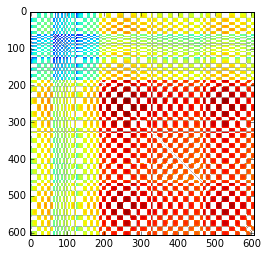

In [548]:
fig, ax =plt.subplots()
ax.imshow(np.log10(Fisher3_tot))

In [91]:
datav_P = masking_datav(RSDPower, np.genfromtxt(params['derivative_P_filename']), kmin = kmin, kmax = kmax)
datav_Xi = np.genfromtxt(params['derivative_Xi_filename'])
datav = np.concatenate((datav_P,datav_Xi), axis=1)

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


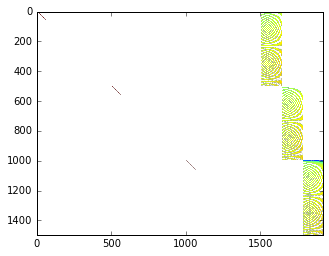

In [96]:
fig, ax =plt.subplots()
ax.imshow(np.log10(datav))

In [98]:
FisherBand = np.dot(np.dot(datav, Fisher3_tot),datav.T)

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


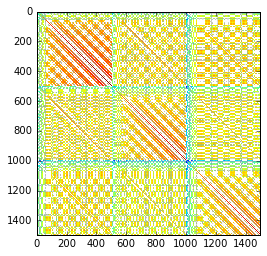

In [99]:
fig, ax =plt.subplots()
ax.imshow(np.log10(FisherBand))

usage: __main__.py [-h] parameter_file
__main__.py: error: unrecognized arguments: -f
[autoreload of run_error_analysis failed: Traceback (most recent call last):
  File "/n/home00/lee.5922/.local/lib/python2.7/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
SystemExit: 2
]
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()


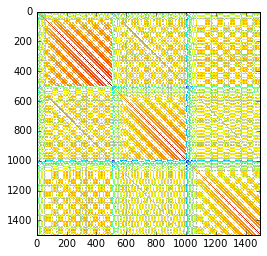

In [100]:
FisherBand_tot = FisherProjection_Fishergiven(datav, Fisher3_tot)
fig, ax =plt.subplots()
ax.imshow(np.log10(FisherBand_tot))

In [101]:
np.allclose(FisherBand_tot, FisherBand)

False

In [77]:
covPXi = masking(RSDPower, np.genfromtxt(params['covPXi_filename']), kmin = kmin, kmax = kmax)

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


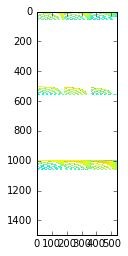

In [78]:
fig, ax = plt.subplots()
ax.imshow(np.log10(covPXi))

In [14]:
if 'multipole_p_filename' not in params:
    P_multipole(params, RSDPower)
else : print '\nUse Precalculated multipole_p ', params['multipole_p_filename']

if 'derivative_P_filename' not in params:
    derivative_P_datavector(params, RSDPower)
else : print 'Use Precalculated derivative_P ', params['derivative_P_filename']     


if 'derivative_Xi_filename' not in params:
    derivative_Xi_datavector(params, RSDPower)
else : print 'Use Precalculated derivative_Xi ', params['derivative_Xi_filename']    

if 'params_datavector_filename' not in params:
    params_datavector(params, RSDPower)
else : print '\nUse Precalculated params_datavector ', params['params_datavector_filename'] 


Use Precalculated multipole_p  data_txt/datav/default_kN500_ke-10_multipole_p.datavector
Use Precalculated derivative_P  data_txt/datav/default_kN500_ke-10_P.datavector
Use Precalculated derivative_Xi  data_txt/datav/default_kN500_ke-10_Xi.datavector

Use Precalculated params_datavector  data_txt/datav/default_kN500_ke-10_params.datavector


In [15]:
#params['fisher_bandpower_tot_filename'] = 'data_txt/cov/default_kN1000_bandpower_tot.fisher'
BandpowerFisher(params, RSDPower, kmin = kmin, kmax = kmax) 
Fisher_params(params, RSDPower, parameter = parameter_ind, kmin=kmin, kmax=kmax)


Use Precalculated FisherP  data_txt/cov/default_kN500_bandpower_PP.fisher
Use Precalculated FisherXi  data_txt/cov/default_kN500_bandpower_Xi.fisher
calculating Fisher tot
12.3163440228
17.0720329285
22.3125739098
42.1423170567
Fishertot saved  data_txt/cov/default_kN500_ke-10_bandpower_tot.fisher


In [25]:
params_xi_datavector(params, RSDPower)
DirectProjection_to_params(params, RSDPower, parameter =parameter_ind, kmin=kmin, kmax=kmax, diffs=False)

calculating Fisher tot
save to data_txt/default_kN500_ke-10_fisher_params_direct.txt


In [670]:
FisherP = masking(RSDPower, np.genfromtxt(params['fisher_bandpower_P_filename']), kmin=kmin, kmax=kmax)

In [673]:
params_datav.shape

(4, 2997)

In [676]:
params_datav = np.genfromtxt(params['params_datavector_filename'])
params_datav_mar = np.vstack(([ params_datav[p,:] for p in parameter] ))
params_datav_mar_kcut = masking_datav(RSDPower, params_datav_mar, kmin=kmin, kmax=kmax)

params_xi_datav = np.genfromtxt(params['params_xi_datavector_filename'])
params_xi_datav_mar = np.vstack(([ params_xi_datav[p,:] for p in parameter] ))
F_params_P = np.dot(np.dot(params_datav_mar_kcut,FisherP), params_datav_mar_kcut.T)

In [677]:
F_params_P

array([[  1.94887424e+05,   5.65714515e+04,  -2.07413032e+03],
       [  5.65714515e+04,   3.19356148e+04,  -1.21026059e+03],
       [ -2.07413032e+03,  -1.21026059e+03,   6.00812831e+01]])

In [410]:
Reid_error(params, RSDPower, parameter = parameter_ind)

parameter sv is marginalized


fig save to  figure/reid_n.pdf


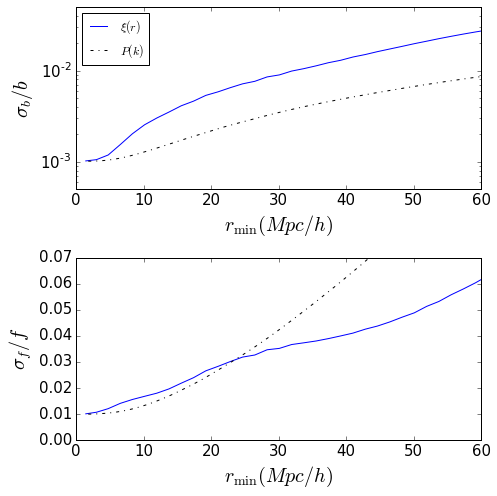

In [412]:
DAT = np.genfromtxt('data_txt/reid/test_reid_xi.txt')
DAT2 = np.genfromtxt('data_txt/reid/test_reid_p.txt')
rlist, errb, errf = [DAT[:,i] for i in range(DAT[0,:].size)]
rlistP, errPb, errPf = [DAT2[:,i] for i in range(DAT2[0,:].size)]

# plotting
fig, (ax, ax2) = plt.subplots(2,1, figsize=(7, 7))
ax.plot(rlist, errb, label = r'$\xi(r)$')
ax2.plot(rlist, errf, label = r'$\xi(r)$')

ax.plot(rlistP, errPb, 'k-.', label = r'$P(k)$')
ax2.plot(rlistP, errPf, 'k-.', label = r'$P(k)$')
ax.set_xlim(0, 60)
ax.set_ylim(0.0005, 0.05)
ax.set_ylabel(r'$\sigma_{b}/b$', size = 20)
ax2.set_ylabel(r'$\sigma_{f}/f$',size=20)
ax.set_xlabel(r'$r_{\rm{min}} (Mpc/h)$', size = 20)
#ax.set_xlabel(r'$k_{\rm{max}} (h/Mpc)$', size = 20)
ax.set_yscale('log')
#ax2.set_xlim(0,60)
ax2.set_xlim(0, 60)
ax2.set_ylim(0.00, 0.07)
#ax2.set_ylabel('f')
ax2.set_xlabel(r'$r_{\rm{min}} (Mpc/h)$', size = 20)
#ax2.set_xlabel(r'$k_{\rm{max}} (h/Mpc)$', size = 20)

ax.legend(loc = 'best')
#ax2.legend(loc='best')

ax.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)
plt.tight_layout()
#ax.set_title(' from F_bandpower ')
#figname = 'figure/reid.pdf'
figname = 'figure/reid_n.pdf'
#fig.savefig(figname)
print 'fig save to ', figname

fig save to  figure/reid_n.pdf


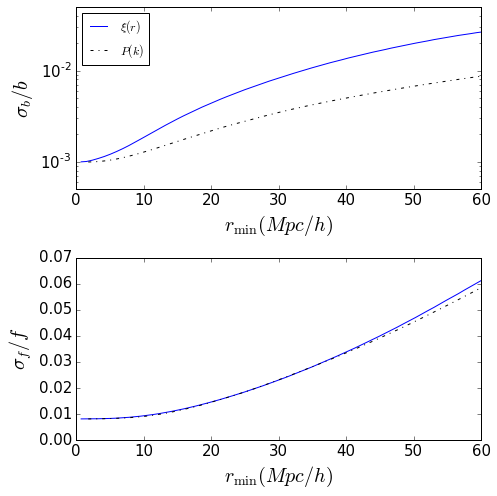

In [418]:
DAT = np.genfromtxt('data_txt/reid/test_bf_reid_xi.txt')
DAT2 = np.genfromtxt('data_txt/reid/test_bf_reid_p.txt')
rlist, errb, errf = [DAT[:,i] for i in range(DAT[0,:].size)]
rlistP, errPb, errPf = [DAT2[:,i] for i in range(DAT2[0,:].size)]

# plotting
fig, (ax, ax2) = plt.subplots(2,1, figsize=(7, 7))
ax.plot(rlist, errb, label = r'$\xi(r)$')
ax2.plot(rlist, errf, label = r'$\xi(r)$')

ax.plot(rlistP, errPb, 'k-.', label = r'$P(k)$')
ax2.plot(rlistP, errPf, 'k-.', label = r'$P(k)$')
ax.set_xlim(0, 60)
ax.set_ylim(0.0005, 0.05)
ax.set_ylabel(r'$\sigma_{b}/b$', size = 20)
ax2.set_ylabel(r'$\sigma_{f}/f$',size=20)
ax.set_xlabel(r'$r_{\rm{min}} (Mpc/h)$', size = 20)
#ax.set_xlabel(r'$k_{\rm{max}} (h/Mpc)$', size = 20)
ax.set_yscale('log')
#ax2.set_xlim(0,60)
ax2.set_xlim(0, 60)
ax2.set_ylim(0.00, 0.07)
#ax2.set_ylabel('f')
ax2.set_xlabel(r'$r_{\rm{min}} (Mpc/h)$', size = 20)
#ax2.set_xlabel(r'$k_{\rm{max}} (h/Mpc)$', size = 20)

ax.legend(loc = 'best')
#ax2.legend(loc='best')

ax.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)
plt.tight_layout()
#ax.set_title(' from F_bandpower ')
#figname = 'figure/reid.pdf'
figname = 'figure/reid_n.pdf'
#fig.savefig(figname)
print 'fig save to ', figname

fig save to  figure/reid_n.pdf


[autoreload of run_error_analysis failed: Traceback (most recent call last):
  File "/n/home00/lee.5922/.local/lib/python2.7/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
  File "run_error_analysis.py", line 63
    if 'covPP_filename' is not in params:
                                ^
SyntaxError: invalid syntax
]


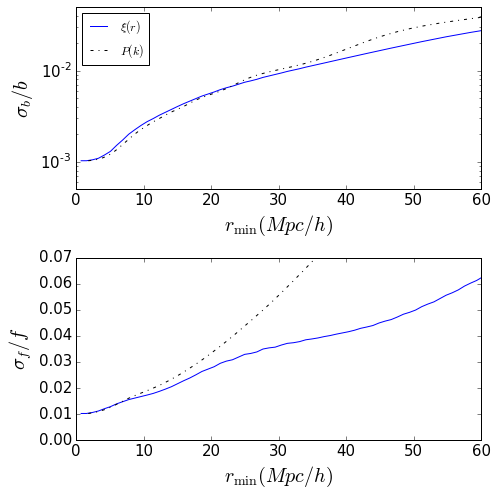

In [427]:
DAT = np.genfromtxt('data_txt/reid/test_bfsn_reid_xi.txt')
DAT2 = np.genfromtxt('data_txt/reid/test_bfsn_reid_p.txt')
rlist, errb, errf = [DAT[:,i] for i in range(DAT[0,:].size)]
rlistP, errPb, errPf = [DAT2[:,i] for i in range(DAT2[0,:].size)]

# plotting
fig, (ax, ax2) = plt.subplots(2,1, figsize=(7, 7))
ax.plot(rlist, errb, label = r'$\xi(r)$')
ax2.plot(rlist, errf, label = r'$\xi(r)$')

ax.plot(rlistP, errPb, 'k-.', label = r'$P(k)$')
ax2.plot(rlistP, errPf, 'k-.', label = r'$P(k)$')
ax.set_xlim(0, 60)
ax.set_ylim(0.0005, 0.05)
ax.set_ylabel(r'$\sigma_{b}/b$', size = 20)
ax2.set_ylabel(r'$\sigma_{f}/f$',size=20)
ax.set_xlabel(r'$r_{\rm{min}} (Mpc/h)$', size = 20)
#ax.set_xlabel(r'$k_{\rm{max}} (h/Mpc)$', size = 20)
ax.set_yscale('log')
#ax2.set_xlim(0,60)
ax2.set_xlim(0, 60)
ax2.set_ylim(0.00, 0.07)
#ax2.set_ylabel('f')
ax2.set_xlabel(r'$r_{\rm{min}} (Mpc/h)$', size = 20)
#ax2.set_xlabel(r'$k_{\rm{max}} (h/Mpc)$', size = 20)

ax.legend(loc = 'best')
#ax2.legend(loc='best')

ax.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)
plt.tight_layout()
#ax.set_title(' from F_bandpower ')
#figname = 'figure/reid.pdf'
figname = 'figure/reid_n.pdf'
#fig.savefig(figname)
print 'fig save to ', figname

In [336]:
data

array([[  0.00000000e+00,   1.92732015e+05,   4.25582490e+05,
          6.59343368e+05],
       [  1.00000000e+00,   5.59902326e+04,   9.38185594e+04,
          1.61090416e+05],
       [  2.00000000e+00,  -2.03050257e+03,  -8.04022963e+03,
         -1.14455406e+04],
       [  3.00000000e+00,   5.59902326e+04,   9.38185594e+04,
          1.61090416e+05],
       [  4.00000000e+00,   3.16190146e+04,   4.88340936e+04,
          8.26569680e+04],
       [  5.00000000e+00,  -1.18553006e+03,  -3.55500511e+03,
         -4.96072197e+03],
       [  6.00000000e+00,  -2.03050257e+03,  -8.04022963e+03,
         -1.14455406e+04],
       [  7.00000000e+00,  -1.18553006e+03,  -3.55500511e+03,
         -4.96072197e+03],
       [  8.00000000e+00,   5.81463269e+01,   4.73987324e+02,
          5.69190526e+02]])

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:43: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


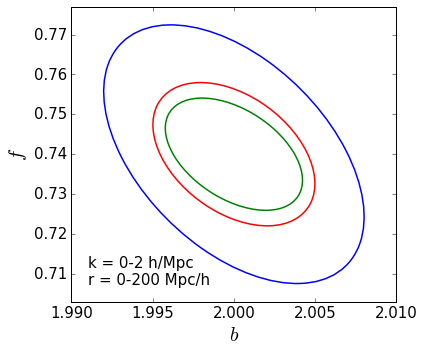

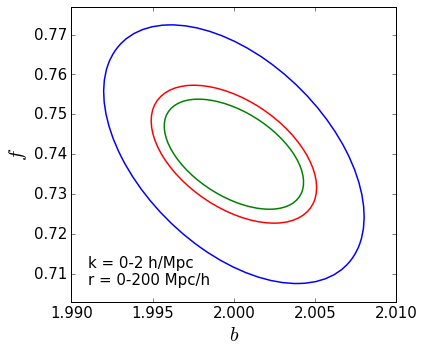

In [26]:
fig, ax = plt.subplots(1,1, figsize = (6,5))
b = 2.0
f = 0.74
#data = np.loadtxt('data_txt/cov_bf_sanchez2016_grieb.txt')
#data = np.loadtxt('data_txt/cov_bf_all_rcond_test.txt')
data = np.loadtxt('data_txt/default_kN500_ke-10_fisher_params.txt')
#data = np.genfromtxt('data_txt/default_kN500_ke-10_fisher_params_direct.txt')
Nx, Ny = data.shape
nx = np.sqrt(Nx)
CovP, covXi, Covtot= [inv(data[:,q].reshape(nx,nx)) for q in range(1,4)]

el = confidence_ellipse(b,f, CovP[0:2, 0:2], covXi[0:2, 0:2], Covtot[0:2, 0:2])
    #el = confidence_ellipse(b,f, covXi[0:2, 0:2], CovXi_direct[0:2, 0:2])
for e in el:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)

xmin = b*0.995
xmax = b*1.005
ymin = f*0.95
ymax = f*1.05

ax.tick_params(labelsize=15)
ax.locator_params(axis = 'x', nbins=5)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_ylabel(r'$f$', size = 20)
ax.set_xlabel(r'$b$', size = 20)
labellist = ['P', 'Xi', 'tot']
ax.text(xmin * 1.0005, ymin, 'k = 0-2 h/Mpc\nr = 0-200 Mpc/h\n', size = 15) 
fig.tight_layout()
fig.savefig('figure/ellipse_all.pdf')

fig, ax = plt.subplots(1,1, figsize = (6,5))
b = 2.0
f = 0.74
#data = np.loadtxt('data_txt/cov_bf_sanchez2016_grieb.txt')
#data = np.loadtxt('data_txt/cov_bf_all_rcond_test.txt')
#data = np.loadtxt('data_txt/default_kN500_ke-10_fisher_params.txt')
data = np.genfromtxt('data_txt/default_kN500_ke-10_fisher_params_direct.txt')
Nx, Ny = data.shape
nx = np.sqrt(Nx)
CovP, covXi, Covtot= [inv(data[:,q].reshape(nx,nx)) for q in range(1,4)]

el = confidence_ellipse(b,f, CovP[0:2, 0:2], covXi[0:2, 0:2], Covtot[0:2, 0:2])
    #el = confidence_ellipse(b,f, covXi[0:2, 0:2], CovXi_direct[0:2, 0:2])
for e in el:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)

xmin = b*0.995
xmax = b*1.005
ymin = f*0.95
ymax = f*1.05

ax.tick_params(labelsize=15)
ax.locator_params(axis = 'x', nbins=5)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_ylabel(r'$f$', size = 20)
ax.set_xlabel(r'$b$', size = 20)
labellist = ['P', 'Xi', 'tot']
ax.text(xmin * 1.0005, ymin, 'k = 0-2 h/Mpc\nr = 0-200 Mpc/h\n', size = 15) 
fig.tight_layout()
fig.savefig('figure/ellipse_all.pdf')

(9, 4)


/usr/lib/python2.7/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


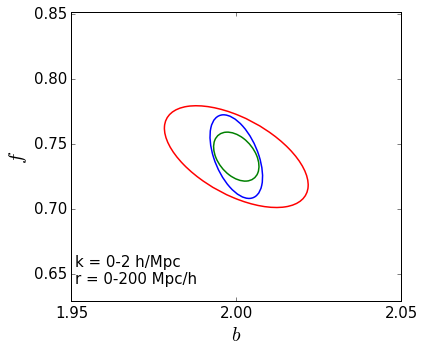

In [432]:
fig, ax = plt.subplots(1,1, figsize = (6,5))
b = 2.0
f = 0.74
#data = np.loadtxt('data_txt/cov_bf_sanchez2016_grieb.txt')
#data = np.loadtxt('data_txt/cov_bf_all_rcond_test.txt')
data = np.loadtxt('data_txt/test_bfs_r20_180_fisher_params.txt')
print data.shape

Nx = np.sqrt(data[:,q].size)
CovP, covXi, Covtot= [inv(data[:,q].reshape(Nx,Nx)) for q in range(1,4)]

el = confidence_ellipse(b,f, CovP[0:2, 0:2], covXi[0:2, 0:2], Covtot[0:2, 0:2])
    #el = confidence_ellipse(b,f, covXi[0:2, 0:2], CovXi_direct[0:2, 0:2])
for e in el:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)

xmin = b*0.975
xmax = b*1.025
ymin = f*0.85
ymax = f*1.15

ax.tick_params(labelsize=15)
ax.locator_params(axis = 'x', nbins=5)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_ylabel(r'$f$', size = 20)
ax.set_xlabel(r'$b$', size = 20)
labellist = ['P', 'Xi', 'tot']
ax.text(xmin * 1.0005, ymin, 'k = 0-2 h/Mpc\nr = 0-200 Mpc/h\n', size = 15) 
fig.tight_layout()
#fig.savefig('figure/ellipse_all.pdf')

In [563]:
cov = np.genfromtxt('data_txt/cov/default_kN1000_PP.cov')

In [564]:
cov_cut = masking(RSDPower, cov, kmin=0.01, kmax=0.25)

/n/home00/lee.5922/.local/lib/python2.7/site-packages/numpy/lib/function_base.py:2569: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/n/home00/lee.5922/.local/lib/python2.7/site-packages/numpy/lib/function_base.py:2570: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


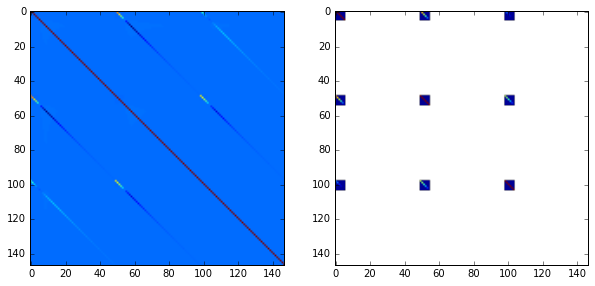

In [553]:
fig, (ax, ax2) = plt.subplots(1,2, figsize=(10,10))
#ax.imshow(np.log10(RSDPower.covariance_PP02))
ax.imshow(np.corrcoef(cov))
ax2.imshow(np.corrcoef(cov_cut))

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log10
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log10


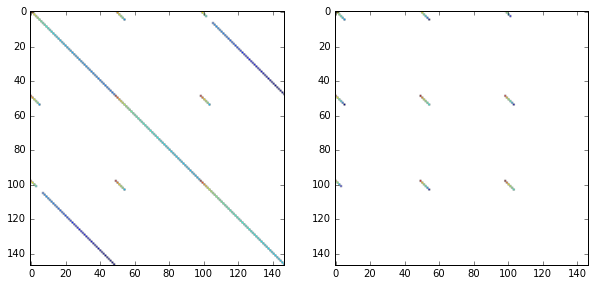

In [554]:
fig, (ax, ax2) = plt.subplots(1,2, figsize=(10,10))
#ax.imshow(np.log10(RSDPower.covariance_PP02))
ax.imshow(np.log10(cov))
ax2.imshow(np.log10(cov_cut))

In [565]:
fisher = pinv(cov)
fisher_cut = pinv(cov_cut)

In [569]:
#np.savetxt('data_txt/cov/default_kN1000_bandpower_PP.fisher', fisher)

In [558]:
fisher_cut[:5,:5]

array([[  8.19902993e-07,  -4.50851801e-23,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  2.69726423e-21,   2.03785186e-05,  -8.87521051e-18,
          3.69009042e-17,   9.92296753e-18],
       [ -2.29217439e-20,  -1.88322501e-18,   2.03475959e-04,
          2.06793550e-16,  -2.60307743e-16],
       [  4.67879996e-20,   2.81036526e-17,  -6.86809737e-17,
          8.29265884e-04,   1.43904053e-15],
       [  1.67328271e-20,  -8.67963111e-18,   2.09619472e-17,
          1.27924220e-15,   2.45606481e-03]])

In [566]:
fisher_masked = masking(RSDPower, fisher, kmin=0.01, kmax=0.25)
fisher_cut_masked = masking(RSDPower, fisher_cut, kmin=0.01, kmax=0.25)
np.allclose(fisher_masked, fisher_cut_masked)

True

usage: __main__.py [-h] parameter_file
__main__.py: error: unrecognized arguments: -f
[autoreload of run_error_analysis failed: Traceback (most recent call last):
  File "/n/home00/lee.5922/.local/lib/python2.7/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
SystemExit: 2
]
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log10
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in log10
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log10
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log10


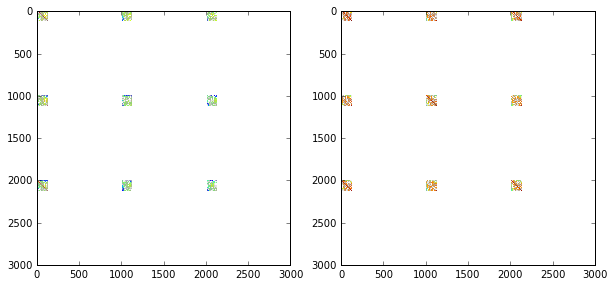

In [570]:
fig, (ax, ax2) = plt.subplots(1,2, figsize=(10,10))
#ax.imshow(np.log10(RSDPower.covariance_PP02))
#ax.imshow(np.corrcoef(fisher))
#ax2.imshow(np.corrcoef(fisher_cut))
ax.imshow(np.log10(fisher_masked))
ax2.imshow(np.log10(fisher_cut_masked))

In [522]:
fisher_cut[:5,:5]

array([[  5.37107530e-08,  -7.71456663e-22,  -8.66641209e-21,
          1.13873393e-33,  -9.78599024e-34],
       [  1.71447223e-22,   7.75785551e-07,  -5.36308304e-20,
          1.88714357e-19,  -3.47825546e-20],
       [  1.25687449e-21,  -3.98893410e-21,   4.89443419e-06,
         -7.48151973e-19,   5.74704716e-19],
       [  2.16503288e-22,  -2.56574149e-20,   4.81650599e-20,
          1.55534846e-05,   2.08355880e-18],
       [ -1.71307200e-22,  -2.28564603e-20,   1.07903185e-19,
          1.14244878e-17,   5.53325620e-05]])

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()


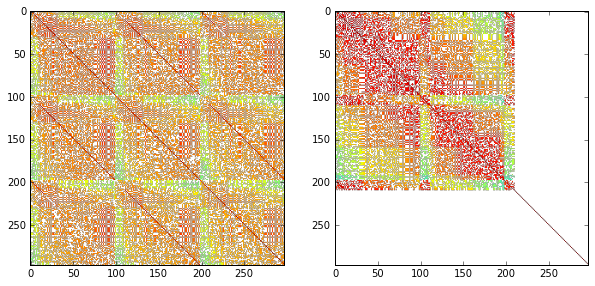

In [519]:
fig, (ax, ax2) = plt.subplots(1,2, figsize=(10,10))
ax.imshow(np.log10(fisher))
ax2.imshow(np.log10(fisher_cut))
#ax.imshow(np.corrcoef(fisher_masked))
#ax2.imshow(np.corrcoef(fisher_cut))

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()


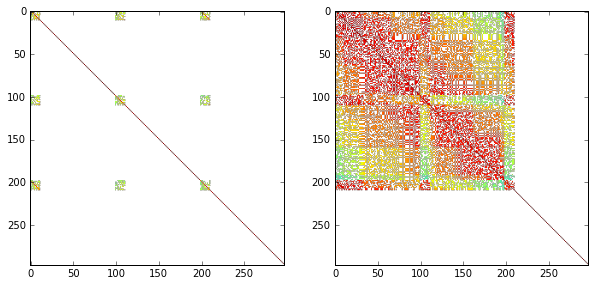

In [503]:
fig, (ax, ax2) = plt.subplots(1,2, figsize=(10,10))
ax.imshow(np.log10(fisher_masked))
ax2.imshow(np.log10(fisher_cut))
#ax.imshow(np.corrcoef(fisher_masked))
#ax2.imshow(np.corrcoef(fisher_cut))

In [512]:
fisher_cut

array([[  5.37107530e-08,  -7.71456663e-22,  -8.66641209e-21, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.71447223e-22,   7.75785551e-07,  -5.36308304e-20, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.25687449e-21,  -3.98893410e-21,   4.89443419e-06, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          9.70404034e-02,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   9.90689329e-02,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   1.01118412e-01]])

In [587]:
ax.lines[-1].get_color

<bound method Line2D.get_color of <matplotlib.lines.Line2D object at 0x3cd71bd0>>

fig save to  figure/reid_n.pdf


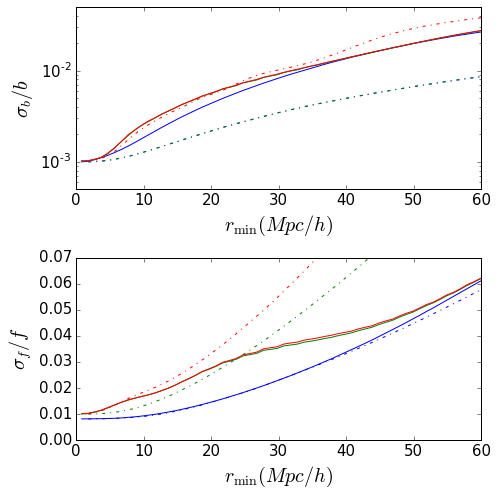

In [610]:


labels = ['reid_bf_kN1000_rN90', 'reid_bfs_kN1000_rN90', 'reid_bfsn_kN1000_rN90']
#labels = ['reid_bf_kN1000', 'reid_bfs_kN1000', 'reid_bfsn_kN1000']
# plotting
fig, (ax, ax2) = plt.subplots(2,1, figsize=(7, 7))

for la in labels :
    DAT = np.genfromtxt('data_txt/reid/'+la+'_reid_xi.txt')
    DAT2 = np.genfromtxt('data_txt/reid/'+la+'_reid_p.txt')
    rlist, errb, errf = [DAT[:,i] for i in range(DAT[0,:].size)]
    rlistP, errPb, errPf = [DAT2[:,i] for i in range(DAT2[0,:].size)]
    ax.plot(rlist, errb, label = r'$\xi(r)$')
    ax2.plot(rlist, errf, label = r'$\xi(r)$', color =ax.lines[-1].get_color())

    ax.plot(rlistP, errPb, 'k-.', label = r'$P(k)$', color =ax.lines[-1].get_color())
    ax2.plot(rlistP, errPf, 'k-.', label = r'$P(k)$', color=ax.lines[-1].get_color())
    
ax.set_xlim(0, 60)
ax.set_ylim(0.0005, 0.05)
ax.set_ylabel(r'$\sigma_{b}/b$', size = 20)
ax2.set_ylabel(r'$\sigma_{f}/f$',size=20)
ax.set_xlabel(r'$r_{\rm{min}} (Mpc/h)$', size = 20)
#ax.set_xlabel(r'$k_{\rm{max}} (h/Mpc)$', size = 20)
ax.set_yscale('log')
#ax2.set_xlim(0,60)
ax2.set_xlim(0, 60)
ax2.set_ylim(0.00, 0.07)
#ax2.set_ylabel('f')
ax2.set_xlabel(r'$r_{\rm{min}} (Mpc/h)$', size = 20)
#ax2.set_xlabel(r'$k_{\rm{max}} (h/Mpc)$', size = 20)



ax.legend(loc = 'best')
#ax2.legend(loc='best')

ax.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)
plt.tight_layout()
#ax.set_title(' from F_bandpower ')
#figname = 'figure/reid.pdf'
figname = 'figure/reid_n.pdf'
#fig.savefig(figname)
print 'fig save to ', figname

(9, 4)


/usr/lib/python2.7/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


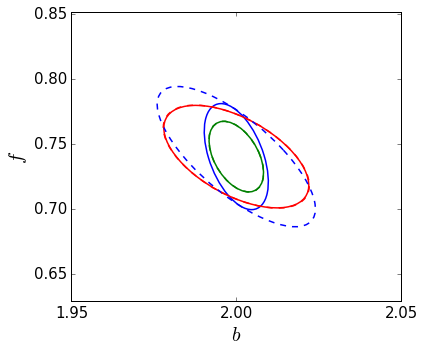

In [604]:
fig, ax = plt.subplots(1,1, figsize = (6,5))
b = 2.0
f = 0.74
#data = np.loadtxt('data_txt/cov_bf_sanchez2016_grieb.txt')
data = np.loadtxt('data_txt/ellipse_test_fisher_params.txt')
data2 = np.loadtxt('data_txt/ellipse_test_bfsn_fisher_params.txt')
print data.shape

Nx = np.sqrt(data[:,q].size)
CovP, covXi, Covtot= [inv(data[:,q].reshape(np.sqrt(data[:,q].size),np.sqrt(data[:,q].size))) for q in range(1,4)]

CovPN, covXiN, CovtotN= [inv(data2[:,q].reshape(np.sqrt(data2[:,q].size),np.sqrt(data2[:,q].size))) for q in range(1,4)]

el = confidence_ellipse(b,f, CovP[0:2, 0:2], covXi[0:2, 0:2], Covtot[0:2, 0:2], CovPN[0:2, 0:2], covXiN[0:2, 0:2], CovtotN[0:2, 0:2])
    #el = confidence_ellipse(b,f, covXi[0:2, 0:2], CovXi_direct[0:2, 0:2])
for e in el:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)

xmin = b*0.975
xmax = b*1.025
ymin = f*0.85
ymax = f*1.15

ax.tick_params(labelsize=15)
ax.locator_params(axis = 'x', nbins=5)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_ylabel(r'$f$', size = 20)
ax.set_xlabel(r'$b$', size = 20)
labellist = ['P', 'Xi', 'tot']
#ax.text(xmin * 1.0005, ymin, 'k = 0-2 h/Mpc\nr = 0-200 Mpc/h\n', size = 15) 
fig.tight_layout()
#fig.savefig('figure/ellipse_all.pdf')

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


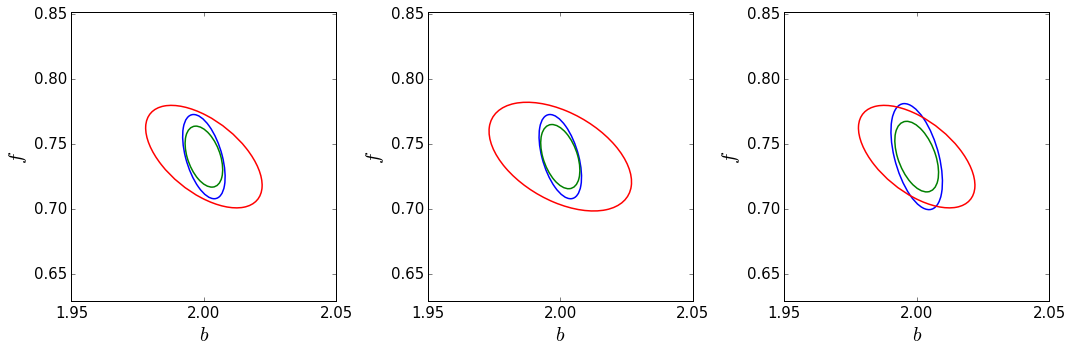

In [619]:

b = 2.0
f = 0.74

labels = ['sanchez', 'satpathy', 'ellipse_test'] 

fig, ax = plt.subplots(1,len(labels), figsize = (5 * len(labels),5))
ax = ax.ravel()

for i, la in enumerate(labels):
    data = np.loadtxt('data_txt/'+la+'_fisher_params.txt')
    data2 = np.loadtxt('data_txt/'+la+'_bfsn_fisher_params.txt')

    CovP, covXi, Covtot= [inv(data[:,q].reshape(np.sqrt(data[:,q].size),np.sqrt(data[:,q].size))) for q in range(1,4)]
    CovPN, covXiN, CovtotN= [inv(data2[:,q].reshape(np.sqrt(data2[:,q].size),np.sqrt(data2[:,q].size))) for q in range(1,4)]

    el = confidence_ellipse(b,f, CovP[0:2, 0:2], covXi[0:2, 0:2], Covtot[0:2, 0:2])
                            #CovPN[0:2, 0:2], covXiN[0:2, 0:2], CovtotN[0:2, 0:2])
        #el = confidence_ellipse(b,f, covXi[0:2, 0:2], CovXi_direct[0:2, 0:2])
    for e in el:
        ax[i].add_artist(e)
        e.set_clip_box(ax[i].bbox)

        xmin = b*0.975
        xmax = b*1.025
        ymin = f*0.85
        ymax = f*1.15

        ax[i].tick_params(labelsize=15)
        ax[i].locator_params(axis = 'x', nbins=5)
        ax[i].set_xlim(xmin, xmax)
        ax[i].set_ylim(ymin, ymax)
        ax[i].set_ylabel(r'$f$', size = 20)
        ax[i].set_xlabel(r'$b$', size = 20)
labellist = ['P', 'Xi', 'tot']
#ax.text(xmin * 1.0005, ymin, 'k = 0-2 h/Mpc\nr = 0-200 Mpc/h\n', size = 15) 
fig.tight_layout()
#fig.savefig('figure/ellipse_all.pdf')

In [620]:
RSDPower.rcenter

array([ 179.49842391,  178.49340126,  177.48837867,  176.48335613,
        175.47833366,  174.47331126,  173.46828891,  172.46326664,
        171.45824443,  170.45322228,  169.44820021,  168.4431782 ,
        167.43815627,  166.43313441,  165.42811262,  164.42309091,
        163.41806927,  162.41304771,  161.40802623,  160.40300484,
        159.39798352,  158.39296229,  157.38794114,  156.38292008,
        155.37789911,  154.37287823,  153.36785745,  152.36283676,
        151.35781616,  150.35279566,  149.34777526,  148.34275497,
        147.33773477,  146.33271469,  145.32769471,  144.32267485,
        143.31765509,  142.31263546,  141.30761594,  140.30259654,
        139.29757726,  138.29255811,  137.28753909,  136.2825202 ,
        135.27750144,  134.27248283,  133.26746435,  132.26244601,
        131.25742783,  130.25240979,  129.24739191,  128.24237418,
        127.23735662,  126.23233922,  125.22732199,  124.22230493,
        123.21728806,  122.21227136,  121.20725485,  120.20223

In [634]:
params_datavector_filename = 'data_txt/datav/default_kN500_ke-10_params.datavector'

In [635]:
params_datav = np.genfromtxt(params_datavector_filename)

In [636]:
params_datav.shape

(4, 1497)

In [638]:
emptyarray = np.zeros(params_datav.shape[1])

In [641]:
params_datav

array([[  3.22584318e+04,   5.44806186e+04,   6.71457367e+04, ...,
          9.52561020e+00,   9.45875054e+00,   9.39458985e+00],
       [  1.16972825e+04,   1.97532766e+04,   2.43403728e+04, ...,
          9.90474612e-02,   9.81768973e-02,   9.73368458e-02],
       [ -1.29982663e-01,  -1.00791186e+00,  -3.16546000e+00, ...,
         -3.95063897e-01,  -3.93167040e-01,  -3.91368035e-01],
       [  1.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [645]:
params_datav_insert = np.insert(params_datav, 2, emptyarray, axis=0 )

In [648]:
params_datav_insert

array([[  3.22584318e+04,   5.44806186e+04,   6.71457367e+04, ...,
          9.52561020e+00,   9.45875054e+00,   9.39458985e+00],
       [  1.16972825e+04,   1.97532766e+04,   2.43403728e+04, ...,
          9.90474612e-02,   9.81768973e-02,   9.73368458e-02],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [ -1.29982663e-01,  -1.00791186e+00,  -3.16546000e+00, ...,
         -3.95063897e-01,  -3.93167040e-01,  -3.91368035e-01],
       [  1.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [176]:
diag = np.arange(1,4)
mat1 = np.diag(diag)
diag2 = np.arange(11,14)
mat2 = np.diag(diag2)
diag3 = np.arange(6,9)
mat3 = np.diag(diag3)

In [180]:
com_mat = np.vstack((np.hstack((mat1, mat2)), np.hstack((mat2, mat3) )))

In [184]:
com_mat_inv = np.vstack((np.hstack(( inv(mat1), inv(mat2) )), 
                         np.hstack(( inv(mat2), inv(mat3)) )))

In [210]:
mask = np.ones(com_mat.shape)
mask[:,(1,4)] = 0
mask[(1,4),:] = 0

mask_bool = np.ones(com_mat.shape, dtype=bool)
mask_bool[:,(1,4)] = 0
mask_bool[(1,4),:] = 0

In [202]:
mask

array([[ 1.,  0.,  1.,  1.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  1.,  1.,  0.,  1.],
       [ 1.,  0.,  1.,  1.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  1.,  1.,  0.,  1.]])

In [217]:
com_mat

array([[ 1,  0,  0, 11,  0,  0],
       [ 0,  2,  0,  0, 12,  0],
       [ 0,  0,  3,  0,  0, 13],
       [11,  0,  0,  6,  0,  0],
       [ 0, 12,  0,  0,  7,  0],
       [ 0,  0, 13,  0,  0,  8]])

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


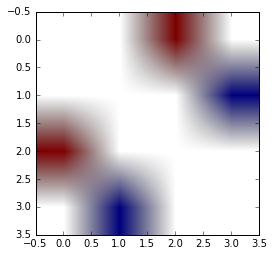

In [232]:
fig, ax = plt.subplots()
ax.imshow( np.log10( inv(com_mat)[mask_bool].reshape(4,4)) )

In [213]:
inv(com_mat[mask_bool].reshape(4,4))

array([[ -5.21739130e-02,   0.00000000e+00,   9.56521739e-02,
          0.00000000e+00],
       [  0.00000000e+00,  -5.51724138e-02,   0.00000000e+00,
          8.96551724e-02],
       [  9.56521739e-02,  -1.45766608e-17,  -8.69565217e-03,
          2.74102081e-17],
       [  0.00000000e+00,   8.96551724e-02,   0.00000000e+00,
         -2.06896552e-02]])

In [216]:
np.allclose(inv(com_mat)[mask_bool].reshape(4,4), inv(com_mat[mask_bool].reshape(4,4)))

True

In [741]:
def masking_out(RSDPower, data, kmin = 0, kmax = 2):
    
    kcut_min = get_closest_index_in_data( kmin, RSDPower.kmin_y )   
    kcut_max = get_closest_index_in_data( kmax, RSDPower.kmax_y )
    
    Nx, Ny = data.shape
    
    if Nx == Ny : 
    #mask0 = np.zeros(RSDPower.kcenter_y.size)
    #mask0[kcut_min:kcut_max+1] = 1
    #maskv = np.hstack([mask0, mask0, mask0])
        
        mask0_x = np.zeros((RSDPower.kcenter_y.size, RSDPower.kcenter_y.size), dtype=bool)
        mask0_y = mask0_x.copy()
        mask0_x[:,kcut_min:kcut_max+1] = 1
        mask0_y[kcut_min:kcut_max+1,:] = 1
        mask0 = mask0_x*mask0_y
        
        mask1 = np.hstack([mask0, mask0, mask0])
        mask = np.vstack([mask1, mask1, mask1])
        cov = data[mask]

        cov = cov.reshape(int(np.sqrt(cov.size)), int(np.sqrt(cov.size)))
        #return cov
    
        """
        if Nx == Ny : 
            cov = np.zeros(data.shape)        
            for i in range(Nx):
                for j in range(Ny):
                    #if i != j : 
                    cov[i][j] = data[i][j]*maskv[i]*maskv[j]
                #cov[i][i] = data[i][i]
                #if dia : cov[i][i] = data[i][i]*maskv[i]*maskv[j]
            return cov

        """    
        return cov
    
    else :    
        mask1 = np.zeros((RSDPower.kcenter_y.size, Ny), dtype=bool)
        mask1[kcut_min:kcut_max+1, :] = 1
        mask = np.vstack([mask1, mask1, mask1])
        return data[mask].reshape(3*(kcut_max-kcut_min+1), Ny)

In [298]:
diag = np.random.rand(10)
mat1 = np.diag(diag)
diag2 = np.random.rand(10)
mat2 = np.diag(diag2)
diag3 = np.random.rand(10)
mat3 = np.diag(diag3)

In [307]:
com_mat = np.vstack((np.hstack((mat1, mat2)), np.hstack((mat2, mat3) )))

In [237]:
com_mat_inv = np.vstack((np.hstack(( inv(mat1), inv(mat2) )), 
                         np.hstack(( inv(mat2), inv(mat3)) )))

In [210]:
mask = np.ones(com_mat.shape)
mask[:,(1,4)] = 0
mask[(1,4),:] = 0

mask_bool = np.ones(com_mat.shape, dtype=bool)
mask_bool[:,(1,4)] = 0
mask_bool[(1,4),:] = 0

In [241]:
com_mat_inv.diagonal()

array([ 1.32445807,  2.56033129,  1.50846997,  7.87220882,  4.82800391,
        1.22164507,  1.46243762,  2.66688718,  1.23865019,  2.38051018,
        0.        ,  1.        ,  0.5       ,  0.33333333,  0.25      ,
        0.2       ,  0.16666667,  0.14285714,  0.125     ,  0.11111111])

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


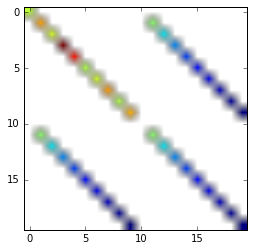

In [242]:
fig, ax = plt.subplots()
ax.imshow(np.log10(com_mat_inv))

In [809]:
zeroblock = np.zeros((3,3))
oneblock = np.ones((3,3))

In [819]:
combine_block = np.hstack((oneblock, zeroblock, zeroblock, zeroblock, zeroblock, zeroblock, zeroblock, zeroblock, zeroblock))

In [821]:
nx = int(np.sqrt(combine_block.size))
combine_block.reshape(nx, nx)

array([[ 1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [820]:
combine_block

array([[ 1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.],
       [ 1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.],
       [ 1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.]])